## DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

### 1. Data Exploration and Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the given audult datset
df= pd.read_csv('adult_with_headers.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We have around 15 features among which 6 are int64, and remaining 9 are object

In [5]:
df.shape

(32561, 15)

We have 32K values for 15 features

In [6]:
df.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##### •	Handle missing values as per the best practices (imputation, removal, etc.).

In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

As we can see there is no null values present in the dataset. There is no need to remove those.
But there are some values with "?" so I am replacing those values with "NaN".

In [9]:
df = df.replace({' ?':np.NaN})

In [10]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Now we can see there are are some null values in 3 columns ..we can drop those values 

In [11]:
df.dropna(inplace=True)

In [12]:
df.shape

(30162, 15)

We can see the number of rows has been decreased after droping the null values.

In [13]:
df.isnull().sum().sum()

0

##### •	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling


#### Standard Scaler 

In [14]:
df1=df.copy()

In [15]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [17]:
std_sca= StandardScaler()

In [18]:
df1[num_col]=std_sca.fit_transform(df1[num_col])

In [19]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
df1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.042796,State-gov,-1.062722,Bachelors,1.128918,Never-married,Adm-clerical,Not-in-family,White,Male,0.146092,-0.218586,-0.077734,United-States,<=50K
1,0.880288,Self-emp-not-inc,-1.007871,Bachelors,1.128918,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.147445,-0.218586,-2.331531,United-States,<=50K
2,-0.033340,Private,0.244693,HS-grad,-0.439738,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.147445,-0.218586,-0.077734,United-States,<=50K
3,1.108695,Private,0.425240,11th,-1.224066,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.147445,-0.218586,-0.077734,United-States,<=50K
4,-0.794697,Private,1.406658,Bachelors,1.128918,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.147445,-0.218586,-0.077734,Cuba,<=50K


#### Min_Max Scaler 

In [21]:
df2=df

In [22]:
min_max=MinMaxScaler()

In [23]:
df2[num_col]=min_max.fit_transform(df2[num_col])

In [24]:
df2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


#### •	Discuss the scenarios where each scaling technique is preferred and why.

StandardScaler: is a scaling techinique used when we want the columns to have mean of 0 and standard deiation of max 1 value.

* It assumes the data follows distribution similar to gaussian distribution for optimal performance.
* It also depends on algorithms that we have to implement for using Standard Scaler.
* Algorithms like Linear and Logistoc Regression, SVM, Lasso and Ridge, PCA, KMeans and hierarical clustering.
* All the above algorithm performs better if the data is scaled using StandardScaler.
* Any data distributed in a gaussian like manner, it is better to use Standard Scaler.


MinMaxScaler: is a scaling techinique used when we want the columns to have fixed range of 0 to 1.

* It is very helpful for the columns having lot of outliers.
* It preserves the shape of the distribution of data, it dosen't standardize rather mearily reduces the scale from 0 to 1.
* There are also few algorithms that prefer MinMaxScaled data rather than StandardScaled data.
* Gardient based algorithms like CNN, RNN, KMeans Clustering.
* The reason why we use MinMaxScaler for these algorithms is because these algorithms rely on distances, and scaling to a fixed range ensures that all features contribute equally.

### 2. Encoding Techniques:

#### •	Apply One-Hot Encoding to categorical variables with less than 5 categories.

In [25]:
cat_col=[i for i in df.columns if df[i].dtype=='O']
cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [26]:
print(df[cat_col].nunique())

workclass          7
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
income             2
dtype: int64


By looking at the above , we can say that for race,sex and income columns contains less than 5 categories.

In [27]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [28]:
encoded_df = df                                    #assigning a new variable to preserve the original df 
encoder = OneHotEncoder(sparse_output=False)                        #disable sparse_output to get dense output
encoded_arr = encoder.fit_transform(df[['race', 'sex', 'income']])    #encode the three columns
encoded_df = pd.DataFrame(encoded_arr, columns = encoder.get_feature_names_out(['race', 'sex', 'income']))      #getting the names of the feature and convert the dense matirx to DataFrame
encoded_df

,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
30157,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30158,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
30159,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
30160,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


This is how the column looks like after using One Hot Encoding, for each unique value in the column it creates a new feature and assign it as True or False depending on the presence of that data point.

#### •	Use Label Encoding for categorical variables with more than 5 categories.

In [29]:
from sklearn.preprocessing import LabelEncoder
converted_cols = pd.DataFrame()
for col in ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'native_country']:
    le = LabelEncoder()
    converted_cols[col] = le.fit_transform(df[col])
converted_cols

,workclass,education,marital_status,occupation,relationship,native_country
0,5,9,4,0,1,38
1,4,9,2,3,0,38
2,2,11,0,5,1,38
3,2,1,2,5,0,38
4,2,9,2,9,5,4
...,...,...,...,...,...,...
30157,2,7,2,12,5,38
30158,2,11,2,6,0,38
30159,2,11,6,0,4,38
30160,2,11,4,0,3,38


This is how the LabelEncoded columns look like each column's unique values are assigned some random number and all the datapoints are converted to that number and similarly all other data points are converted.

#### •	Discuss the pros and cons of One-Hot Encoding and Label Encoding.

#### 3. Feature Engineering:

##### •	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.

In [30]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [31]:
df['net_capital'] = df['capital_gain'] - df['capital_loss']
df['net_capital']

0        0.021740
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
32556    0.000000
32557    0.000000
32558    0.000000
32559    0.000000
32560    0.150242
Name: net_capital, Length: 30162, dtype: float64

So by combining the capital_gain and capital_loss we can make a new column so that we can get the avarage of capital for out dataframe.

In [32]:
df['marital_status'].value_counts()

marital_status
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

In [33]:
df['new_marital_status']=df['marital_status'].map({' Married-civ-spouse':'Married',
                                                ' Married-AF-spouse':'Married',
                                                ' Never-married':'Never-married',
                                                ' Divorced':'Divorced',
                                                ' Separated':'Divorced',
                                                ' Married-spouse-absent':'Married-spouse-absent',
                                                ' Widowed':'Widowed'})

In [34]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,new_marital_status
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K,0.021740,Never-married
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K,0.000000,Married
2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K,0.000000,Divorced
3,0.493151,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K,0.000000,Married
4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K,0.000000,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.165563,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K,0.000000,Married
32557,0.315068,Private,0.095589,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K,0.000000,Married
32558,0.561644,Private,0.093914,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K,0.000000,Widowed
32559,0.068493,Private,0.127620,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K,0.000000,Never-married


We can see the new features have been added at the end of the df working as new features.
Similarly we can explore many other features are create new ones from them.

##### •	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [35]:
from scipy.stats import skew

In [36]:
df[num_col].skew()

age                0.530228
fnlwgt             1.459220
education_num     -0.305379
capital_gain      11.902682
capital_loss       4.526380
hours_per_week     0.330869
dtype: float64

1.We can see almost all of the columns are positively skewed and only "education_num" is negatively skewed.
2.We also observe here that "capital_gain" is the column which is highly skewed with the skewness of over 11.9
3.So we'll be applying log transformation to "capital_gain".

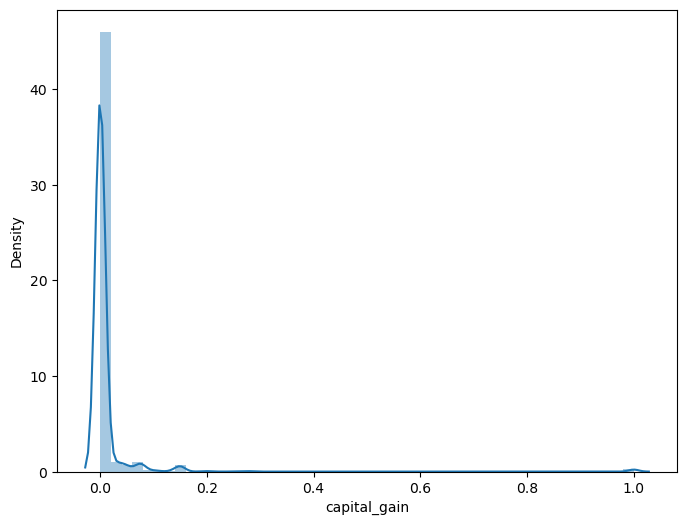

In [37]:
import warnings
warnings.filterwarnings("ignore")

# Let's see these 2 columns more closely with a distplot
plt.figure(figsize = (8,6))
sns.distplot(df['capital_gain'])
plt.show()

In [38]:

df['capital_gain_log'] = np.log1p(df['capital_gain'])

In [39]:

df[['capital_gain_log']].head()

,capital_gain_log
0,0.021507
1,0.000000
2,0.000000
3,0.000000
4,0.000000


In [40]:
print(f'"capital_gain_log" has skeweness score of {df['capital_gain_log'].skew()}')  

"capital_gain_log" has skeweness score of 10.608535395160171


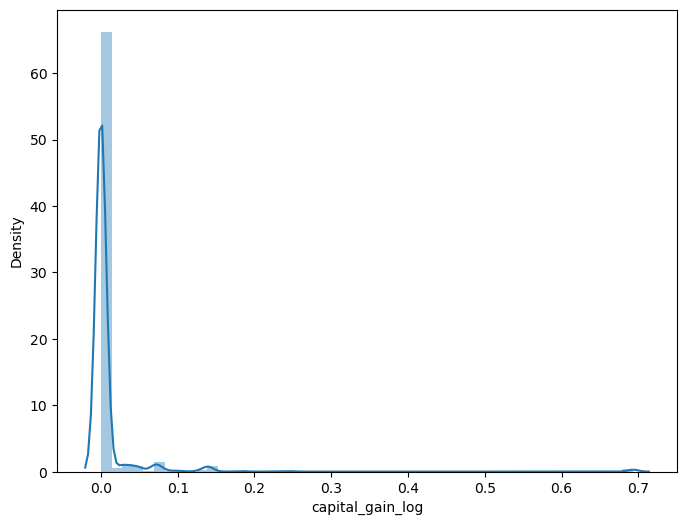

In [41]:
# Let's see in the form of a distplot

plt.figure(figsize = (8,6))
sns.distplot(df['capital_gain_log'])
plt.show()


#### 4. Feature Selection:

##### •	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [42]:
features=df[['age','fnlwgt','education_num','net_capital','capital_gain','capital_loss','hours_per_week','capital_gain_log']]
features.head()

,age,fnlwgt,education_num,net_capital,capital_gain,capital_loss,hours_per_week,capital_gain_log
0,0.301370,0.043338,0.800000,0.02174,0.02174,0.0,0.397959,0.021507
1,0.452055,0.047277,0.800000,0.00000,0.00000,0.0,0.122449,0.000000
2,0.287671,0.137244,0.533333,0.00000,0.00000,0.0,0.397959,0.000000
3,0.493151,0.150212,0.400000,0.00000,0.00000,0.0,0.397959,0.000000
4,0.150685,0.220703,0.800000,0.00000,0.00000,0.0,0.397959,0.000000


Selecting the numerical columns to detect and remove outliers

In [43]:
from sklearn.ensemble import IsolationForest

In [44]:
iso= IsolationForest(n_estimators=100,contamination=0.1)

In [45]:
df['outlier_flag']=iso.fit_predict(features)             #fit and predict it with the numerical feature and save it in a column indicating if it is an outlier or not
df['outlier_flag'].sample(5)                      #checking few samples of the column

16423    1
14752    1
31182    1
28252    1
9446     1
Name: outlier_flag, dtype: int32

In [46]:
df['outlier_flag'].value_counts()            #finding the total number of outliers in our numerical columns

outlier_flag
 1    27145
-1     3017
Name: count, dtype: int64

In [47]:
x=features.values

In [48]:
# Let's remove the outliers
cleaned_df = df[df['outlier_flag'] == 1]               # selecting all the columns that are not an outlier
cleaned_df = cleaned_df.drop('outlier_flag', axis=1)   #dropping the outlier_flag column since its work is done and no longer of any use
cleaned_df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,net_capital,new_marital_status,capital_gain_log
0,0.301370,State-gov,0.043338,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K,0.02174,Never-married,0.021507
1,0.452055,Self-emp-not-inc,0.047277,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K,0.00000,Married,0.000000
2,0.287671,Private,0.137244,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K,0.00000,Divorced,0.000000
3,0.493151,Private,0.150212,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K,0.00000,Married,0.000000
4,0.150685,Private,0.220703,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K,0.00000,Married,0.000000


Discussion on how outliers may affect model's performance

1.Outliers do effect models like LR, MLR, Logistic Regression and many others to be biased towards incurring coefficients and inaccurate predictions.
2.As we discussed earlier when we use LabelEncoder on column having high Ordinal the algorith may be a bit biased towards higher numbers similarly 3.outliers may have higher number than usual and may lead to bias in our model hence increasing inaccuracy of the model.
4.Outliers affect algorithms like KNN or Clustering methods since they are very sensitive towards distance may cause instability.
5.The model will definitely overfit if it treats an outlier as a valid datapoint
6.Benefits of removing outliers are reduces noise, let's model to focus on core datapoints, increases model accuracy, creates more reliable model
7.There are a few instances where we shouldn't be removing outliers when that outlier reveals an important situation (for example suddent increase in heart-rate may reveal that the person may get a heart attack)

In [49]:
!pip install ppscore

#####  •	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [50]:
import ppscore as pps                            # import ppscore

pps_score = pps.matrix(cleaned_df[['age','education_num','capital_gain','capital_loss','hours_per_week']])           # 
pps_score  

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,education_num,0.000000,regression,True,mean absolute error,0.118920,0.121589,DecisionTreeRegressor()
2,age,capital_gain,0.000000,regression,True,mean absolute error,0.001637,0.003133,DecisionTreeRegressor()
3,age,capital_loss,0.000000,regression,True,mean absolute error,0.000302,0.000612,DecisionTreeRegressor()
4,age,hours_per_week,0.000000,regression,True,mean absolute error,0.070320,0.076106,DecisionTreeRegressor()
5,education_num,age,0.018820,regression,True,mean absolute error,0.143296,0.140599,DecisionTreeRegressor()
6,education_num,education_num,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,education_num,capital_gain,0.000000,regression,True,mean absolute error,0.001637,0.003130,DecisionTreeRegressor()
8,education_num,capital_loss,0.000000,regression,True,mean absolute error,0.000302,0.000602,DecisionTreeRegressor()
9,education_num,hours_per_week,0.000000,regression,True,mean absolute error,0.070320,0.075872,DecisionTreeRegressor()


In [51]:
print(pps_score[['x', 'y', 'ppscore']].sort_values(by='ppscore', ascending=False))

                 x               y   ppscore
0              age             age  1.000000
6    education_num   education_num  1.000000
18    capital_loss    capital_loss  1.000000
12    capital_gain    capital_gain  1.000000
24  hours_per_week  hours_per_week  1.000000
5    education_num             age  0.018820
20  hours_per_week             age  0.002081
15    capital_loss             age  0.000000
23  hours_per_week    capital_loss  0.000000
22  hours_per_week    capital_gain  0.000000
21  hours_per_week   education_num  0.000000
19    capital_loss  hours_per_week  0.000000
2              age    capital_gain  0.000000
17    capital_loss    capital_gain  0.000000
16    capital_loss   education_num  0.000000
4              age  hours_per_week  0.000000
13    capital_gain    capital_loss  0.000000
1              age   education_num  0.000000
11    capital_gain   education_num  0.000000
10    capital_gain             age  0.000000
9    education_num  hours_per_week  0.000000
8    educa

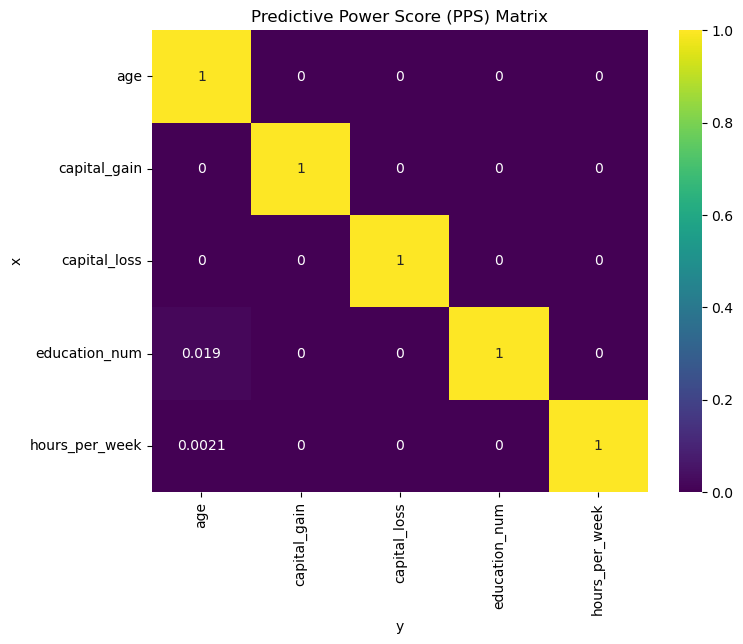

In [52]:
# Pivot the PPS matrix for a heatmap
pps_heatmap = pps_score.pivot(index='x', columns='y', values='ppscore')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pps_heatmap, cmap='viridis', annot=True)
plt.title('Predictive Power Score (PPS) Matrix')
plt.show()

In [53]:
#Let's Find correlation
z = cleaned_df[['age','education_num','capital_gain','capital_loss','hours_per_week']].corr()
z

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,0.035367,0.021319,0.014300,0.116027
education_num,0.035367,1.000000,0.038150,0.003976,0.128736
capital_gain,0.021319,0.038150,1.000000,-0.005998,0.021166
capital_loss,0.014300,0.003976,-0.005998,1.000000,0.000781
hours_per_week,0.116027,0.128736,0.021166,0.000781,1.000000


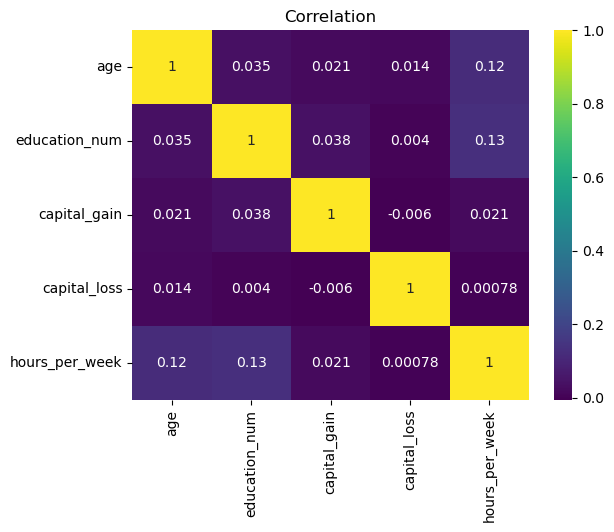

In [54]:
# Let's plot Heatmap of correlation of the numerical columns
sns.heatmap(z, cmap='viridis', annot=True)
plt.title('Correlation')
plt.show()

Let's discuss the differences between PPS and correlation Matrix

1.PPS (Predictive Power Score):

a.Measures the predictive power between pairs of variables.
b.Takes into account both linear and non-linear relationships.
c.Can handle categorical variables and can be used to predict both categorical and continuous variables.
d.Provides a better view of how much one feature can help predict another, regardless of the type of relationship (non-linear, interactions, etc.).
    
2.Correlation Matrix:
a.Measures linear relationships between numerical variables.
b.The correlation coefficient (Pearson's r) ranges from -1 to 1, where 1 means a perfect positive linear relationship, and -1 means a perfect negative linear relationship.
c.It cannot capture non-linear relationships, categorical variables, or interactions.